In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Saltar este codigo

In [ ]:
# creating a sequential model
cnn = tf.keras.models.Sequential()

# adding convolution layer to network
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# adding pooling layer to network
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# adding a flatten layer to CNN
cnn.add(tf.keras.layers.Flatten())

# adding fully connected layers
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))

# output layer -> 6 Neurons for 6 different classes
# activation function used for multiclass classification is softmax, for binary use sigmoid as activation fxn
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

Continuar aquí

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
main_folder="drive/MyDrive/dataset unido"

In [ ]:
import os
print(os.listdir(main_folder))

['metal', 'paper', 'plastic', 'cardboard', 'glass', 'trash']


Saltar este codigo

In [ ]:
from pathlib import Path
import imghdr

data_dir = main_folder
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            #os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(main_folder)

In [ ]:
import numpy as np

data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len

Continuar a partir de aquí

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(main_folder, output='dataset-split-unido', seed = 1337, ratio= (0.7,0.2,0.1), group_prefix =  None, move = False)

Copying files: 12177 files [05:19, 38.06 files/s] 


In [ ]:
import os
print(os.listdir('dataset-split-unido'))

['train', 'test', 'val']


In [ ]:
print(os.listdir('dataset-split-unido/train/cardboard'))

['cardboard 4.jpg', 'cardboard 1983.jpg', 'cardboard 1103.jpg', 'cardboard 373.jpg', 'cardboard-trahsnet (170).jpg', 'cardboard 1031.jpg', 'cardboard 605.jpg', 'cardboard 2178.jpg', 'cardboard 1471.jpg', 'cardboard 1442.jpg', 'cardboard 314.jpg', 'cardboard 627.jpg', 'cardboard 1485.jpg', 'cardboard 1903.jpg', 'cardboard 1910.jpg', 'cardboard 557.jpg', 'cardboard 2173.jpg', 'cardboard 2333.jpg', 'cardboard 1236.jpg', 'cardboard 530.jpg', 'cardboard-trahsnet (74).jpg', 'cardboard 531.jpg', 'cardboard-trahsnet (47).jpg', 'cardboard-trahsnet (9).jpg', 'cardboard 285.jpg', 'cardboard 1217.jpg', 'cardboard 518.jpg', 'cardboard 183.jpg', 'cardboard 1420.jpg', 'cardboard 2128.jpg', 'cardboard-trahsnet (153).jpg', 'cardboard-trahsnet (328).jpg', 'cardboard 2198.jpg', 'cardboard 1627.jpg', 'cardboard 2338.jpg', 'cardboard 1589.jpg', 'cardboard 2386.jpg', 'cardboard-trahsnet (104).jpg', 'cardboard 229.jpg', 'cardboard 1058.jpg', 'cardboard-trahsnet (367).jpg', 'cardboard 579.jpg', 'cardboard 110

Mostrar imagenes

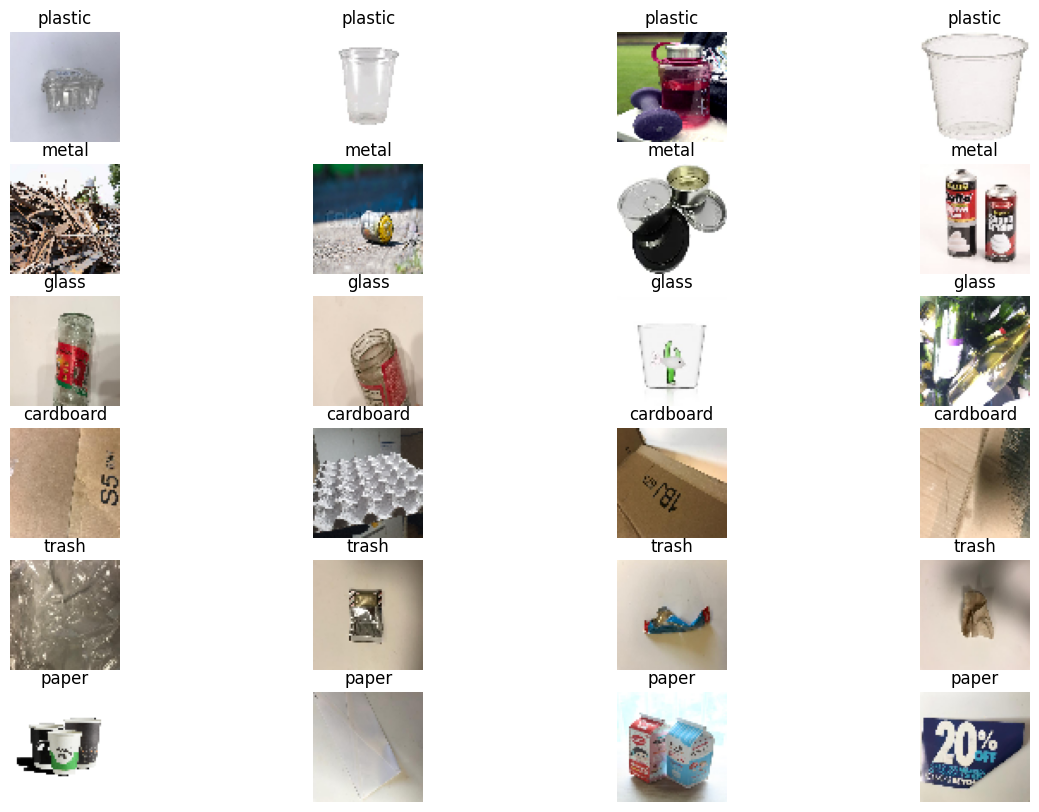

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = 'dataset-split-unido/train'

# Define the number of images to display for each class
num_images_per_class = 4

# Get the list of classes
classes = os.listdir(dataset_path)

# Create a figure to display images
plt.figure(figsize=(15, 10))

# Loop through each class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    class_images = os.listdir(class_path)[:num_images_per_class]

    # Loop through each image in the class
    for i, img_name in enumerate(class_images):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(64, 64))  # Adjust target_size as needed
        plt.subplot(len(classes), num_images_per_class, classes.index(class_name) * num_images_per_class + i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.show()

Saltar este cuadrado de codigo

In [ ]:


def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        # Preprocess the image as needed (e.g., resize, normalize)
        # ...
        img_array = np.array(img)
        return img_array
    except (PIL.UnidentifiedImageError, OSError):
        # Handle the exception, you can log it or print a message.
        print(f"Skipping {image_path} due to an error.")
        return None



Preproceso para que las imagenes estén correctas

In [ ]:
import cv2
from PIL import Image
import os,sys
import PIL
import numpy as np

classes=['cardboard','paper','plastic','trash','glass','metal']
X_train = []
Y_train = []
train_directory = 'dataset-split-unido/train'

# Loop through your dataset directory
for class_folder in os.listdir(train_directory):
    class_path = os.path.join(train_directory, class_folder)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            img = Image.open(image_path).convert('RGB')
            img = img.resize((64, 64))
            img = np.array(img)
            if img.shape == (64, 64, 3):
              X_train.append((img,class_folder))
              Y_train.append(classes.index(class_folder))
            else:
              print(f"Skipping {image_path} due to incompatible dimensions.")
              print(f"Image shape: {img.shape}")
            # If you have labels, append them to Y_train
        except (PIL.UnidentifiedImageError, OSError):
            print(f"Skipping {image_path} due to an error.")

# Convert the image data to a NumPy array
X_train = np.array(X_train, dtype=object)
Y_train = np.array(Y_train)

X_test = []
Y_test = []
test_directory = 'dataset-split-unido/test'

# Loop through your dataset directory
for class_folder in os.listdir(test_directory):
    class_path = os.path.join(test_directory, class_folder)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
            img = Image.open(image_path).convert('RGB')
            img = img.resize((64, 64))
            img = np.array(img)
            if img.shape == (64, 64, 3):
              X_test.append((img,class_folder))
              Y_test.append(classes.index(class_folder))
            else:
              print(f"Skipping {image_path} due to incompatible dimensions.")
              print(f"Image shape: {img.shape}")
            # If you have labels, append them to Y_train
        except (PIL.UnidentifiedImageError, OSError):
            print(f"Skipping {image_path} due to an error.")

# Convert the image data to a NumPy array
X_test = np.array(X_test, dtype=object)
Y_test = np.array(Y_test)

Skipping dataset-split-unido/train/cardboard/cardboard 1075.jpg due to an error.


In [ ]:
print(np.shape(X_train))

(8521, 2)


In [ ]:
def custom_generator(images, labels, batch_size):
    num_samples = len(images)
    while True:
        for i in range(0, num_samples, batch_size):
            batch_images = np.array(images[i:i + batch_size])
            batch_labels = np.array(labels[i:i + batch_size])
            yield (batch_images, batch_labels)

Peores codigos hasta el de titulo modelo con 2 datasets

Modelo basico

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
#cnn.add(BatchNormalization())
#cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30) #callbacks=[reduce_lr,early_stop]


Epoch 1/30
267/267 [==============================] - 19s 64ms/step - loss: 1.5506 - accuracy: 0.3257 - val_loss: 1.4668 - val_accuracy: 0.3740
Epoch 2/30
267/267 [==============================] - 17s 62ms/step - loss: 1.4375 - accuracy: 0.4105 - val_loss: 1.4063 - val_accuracy: 0.4414
Epoch 3/30
267/267 [==============================] - 18s 68ms/step - loss: 1.3753 - accuracy: 0.4453 - val_loss: 1.3474 - val_accuracy: 0.4430
Epoch 4/30
267/267 [==============================] - 18s 68ms/step - loss: 1.3360 - accuracy: 0.4691 - val_loss: 1.2991 - val_accuracy: 0.4805
Epoch 5/30
267/267 [==============================] - 17s 63ms/step - loss: 1.3039 - accuracy: 0.4825 - val_loss: 1.2997 - val_accuracy: 0.4840
Epoch 6/30
267/267 [==============================] - 19s 71ms/step - loss: 1.2772 - accuracy: 0.4890 - val_loss: 1.2738 - val_accuracy: 0.4934
Epoch 7/30
267/267 [==============================] - 17s 63ms/step - loss: 1.2641 - accuracy: 0.4997 - val_loss: 1.2352 - val_accuracy:

Añadiendo BatchNormalization

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(BatchNormalization())
#cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30) #callbacks=[reduce_lr,early_stop]

Epoch 1/30
267/267 [==============================] - 20s 66ms/step - loss: 1.4794 - accuracy: 0.4031 - val_loss: 1.9426 - val_accuracy: 0.2632
Epoch 2/30
267/267 [==============================] - 17s 65ms/step - loss: 1.3150 - accuracy: 0.4840 - val_loss: 1.4844 - val_accuracy: 0.4042
Epoch 3/30
267/267 [==============================] - 17s 65ms/step - loss: 1.2821 - accuracy: 0.4909 - val_loss: 1.6791 - val_accuracy: 0.3764
Epoch 4/30
267/267 [==============================] - 19s 70ms/step - loss: 1.2381 - accuracy: 0.5132 - val_loss: 1.6831 - val_accuracy: 0.3557
Epoch 5/30
267/267 [==============================] - 24s 89ms/step - loss: 1.2207 - accuracy: 0.5255 - val_loss: 2.0069 - val_accuracy: 0.3118
Epoch 6/30
267/267 [==============================] - 17s 64ms/step - loss: 1.2028 - accuracy: 0.5290 - val_loss: 1.7384 - val_accuracy: 0.3534
Epoch 7/30
267/267 [==============================] - 16s 61ms/step - loss: 1.1603 - accuracy: 0.5579 - val_loss: 1.4961 - val_accuracy:

Añadiendo Dropout

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
#cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30) #callbacks=[reduce_lr,early_stop]

Epoch 1/30
267/267 [==============================] - 19s 62ms/step - loss: 1.6421 - accuracy: 0.2442 - val_loss: 1.5130 - val_accuracy: 0.3490
Epoch 2/30
267/267 [==============================] - 18s 67ms/step - loss: 1.5236 - accuracy: 0.3402 - val_loss: 1.4428 - val_accuracy: 0.3785
Epoch 3/30
267/267 [==============================] - 16s 61ms/step - loss: 1.4590 - accuracy: 0.3970 - val_loss: 1.3576 - val_accuracy: 0.4526
Epoch 4/30
267/267 [==============================] - 17s 62ms/step - loss: 1.4221 - accuracy: 0.4197 - val_loss: 1.3811 - val_accuracy: 0.4302
Epoch 5/30
267/267 [==============================] - 17s 62ms/step - loss: 1.3887 - accuracy: 0.4433 - val_loss: 1.3063 - val_accuracy: 0.4879
Epoch 6/30
267/267 [==============================] - 17s 62ms/step - loss: 1.3643 - accuracy: 0.4552 - val_loss: 1.3313 - val_accuracy: 0.4641
Epoch 7/30
267/267 [==============================] - 16s 61ms/step - loss: 1.3424 - accuracy: 0.4691 - val_loss: 1.2926 - val_accuracy:

Añadiendo BatchNorm y Dropout

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30) #callbacks=[reduce_lr,early_stop]

Epoch 1/30
267/267 [==============================] - 31s 59ms/step - loss: 1.6674 - accuracy: 0.3420 - val_loss: 1.7961 - val_accuracy: 0.2429
Epoch 2/30
267/267 [==============================] - 17s 64ms/step - loss: 1.4559 - accuracy: 0.4120 - val_loss: 1.5755 - val_accuracy: 0.3714
Epoch 3/30
267/267 [==============================] - 15s 57ms/step - loss: 1.4101 - accuracy: 0.4394 - val_loss: 1.2782 - val_accuracy: 0.4979
Epoch 4/30
267/267 [==============================] - 16s 60ms/step - loss: 1.3697 - accuracy: 0.4556 - val_loss: 1.6586 - val_accuracy: 0.3550
Epoch 5/30
267/267 [==============================] - 16s 58ms/step - loss: 1.3438 - accuracy: 0.4663 - val_loss: 1.2982 - val_accuracy: 0.4803
Epoch 6/30
267/267 [==============================] - 16s 59ms/step - loss: 1.3100 - accuracy: 0.4839 - val_loss: 1.3904 - val_accuracy: 0.4212
Epoch 7/30
267/267 [==============================] - 16s 60ms/step - loss: 1.3013 - accuracy: 0.4936 - val_loss: 1.9607 - val_accuracy:

Transfer Learning con VGG16

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2)


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
#cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
#cnn.add(BatchNormalization())
#cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=30) #callbacks=[reduce_lr,early_stop]

Epoch 1/30
267/267 [==============================] - 30s 90ms/step - loss: 1.6562 - accuracy: 0.2266 - val_loss: 1.5960 - val_accuracy: 0.2883
Epoch 2/30
267/267 [==============================] - 22s 83ms/step - loss: 1.6762 - accuracy: 0.2522 - val_loss: 1.6282 - val_accuracy: 0.2480
Epoch 3/30
267/267 [==============================] - 24s 91ms/step - loss: 1.6166 - accuracy: 0.2635 - val_loss: 1.5955 - val_accuracy: 0.2706
Epoch 4/30
267/267 [==============================] - 22s 83ms/step - loss: 1.5975 - accuracy: 0.2709 - val_loss: 1.6822 - val_accuracy: 0.2508
Epoch 5/30
267/267 [==============================] - 22s 83ms/step - loss: 1.5974 - accuracy: 0.2794 - val_loss: 1.6625 - val_accuracy: 0.2898
Epoch 6/30
267/267 [==============================] - 22s 83ms/step - loss: 1.5529 - accuracy: 0.3143 - val_loss: 1.4748 - val_accuracy: 0.3646
Epoch 7/30
267/267 [==============================] - 24s 89ms/step - loss: 1.5626 - accuracy: 0.3068 - val_loss: 1.4698 - val_accuracy:

# Modelo con 2 datasets



3 capas de 1024 y batchnorm

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest')


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)



# Define learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)




# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
epochs=50
batch_size=128
# finally compile and train the cnn
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=epochs, callbacks=[reduce_lr,checkpoint])
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
266/267 [============================>.] - ETA: 0s - loss: 2.2646 - accuracy: 0.2959
Epoch 1: val_accuracy improved from -inf to 0.33118, saving model to best_model.h5
267/267 [==============================] - 31s 65ms/step - loss: 2.2640 - accuracy: 0.2962 - val_loss: 2.5758 - val_accuracy: 0.3312 - lr: 0.0100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
266/267 [============================>.] - ETA: 0s - loss: 1.6014 - accuracy: 0.3878
Epoch 2: val_accuracy did not improve from 0.33118
267/267 [==============================] - 17s 63ms/step - loss: 1.6011 - accuracy: 0.3874 - val_loss: 2.9350 - val_accuracy: 0.2277 - lr: 0.0100
Epoch 3/50
266/267 [============================>.] - ETA: 0s - loss: 1.3904 - accuracy: 0.4547
Epoch 3: val_accuracy improved from 0.33118 to 0.43481, saving model to best_model.h5
267/267 [==============================] - 21s 78ms/step - loss: 1.3895 - accuracy: 0.4552 - val_loss: 1.4323 - val_accuracy: 0.4348 - lr: 0.0100
Epoch 4/50
266/267 [============================>.] - ETA: 0s - loss: 1.3173 - accuracy: 0.4830
Epoch 4: val_accuracy did not improve from 0.43481
267/267 [==============================] - 18s 66ms/step - loss: 1.3164 - accuracy: 0.4837 - val_loss: 1.4537 - val_accuracy: 0.3724 - lr: 0.0100
Epoch 5/50
267/267 [==============================] - ETA: 0s - loss: 1.2663 - accurac

NameError: ignored

In [ ]:
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7222535610198975
Test accuracy: 0.772796630859375


Cambios respecto al modelo anterior que da 77% - L2 Regularization - peores resultados (71%)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam
from keras.regularizers import l2

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest')


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)



# Define learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)




# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
epochs=50
batch_size=128
# finally compile and train the cnn
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=epochs, callbacks=[reduce_lr,checkpoint])
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
267/267 [==============================] - ETA: 0s - loss: 9.8225 - accuracy: 0.2746
Epoch 1: val_accuracy improved from -inf to 0.28084, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


267/267 [==============================] - 34s 65ms/step - loss: 9.8225 - accuracy: 0.2746 - val_loss: 3.0721 - val_accuracy: 0.2808 - lr: 0.0100
Epoch 2/50
267/267 [==============================] - ETA: 0s - loss: 3.0389 - accuracy: 0.3192
Epoch 2: val_accuracy did not improve from 0.28084
267/267 [==============================] - 17s 63ms/step - loss: 3.0389 - accuracy: 0.3192 - val_loss: 5.2686 - val_accuracy: 0.2056 - lr: 0.0100
Epoch 3/50
267/267 [==============================] - ETA: 0s - loss: 2.4991 - accuracy: 0.3552
Epoch 3: val_accuracy improved from 0.28084 to 0.28377, saving model to best_model.h5
267/267 [==============================] - 17s 63ms/step - loss: 2.4991 - accuracy: 0.3552 - val_loss: 2.4690 - val_accuracy: 0.2838 - lr: 0.0100
Epoch 4/50
267/267 [==============================] - ETA: 0s - loss: 2.3683 - accuracy: 0.3692
Epoch 4: val_accuracy improved from 0.28377 to 0.35395, saving model to best_model.h5
267/267 [==============================] - 16s 61ms


# Modelo cosine annealing
Prueba del modelo de 77% pero con otro learning rate scheduler(cosine annealing with restarts) - era mentira el 95%

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import math

lr_max=0.001
lr_min=0.00001
epochs=100

def cosine_annealing_with_restarts(x):
    lr = lr_max/2 * (1 + math.cos(math.pi * (x % (epochs/5)) / (epochs/5)))
    if lr<lr_min:
        lr=lr_min
    return lr

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest')


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)

reduce_lr = LearningRateScheduler(cosine_annealing_with_restarts)

# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
epochs=50
batch_size=128
# finally compile and train the cnn
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=epochs, callbacks=[reduce_lr,checkpoint])
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
267/267 [==============================] - ETA: 0s - loss: 1.7096 - accuracy: 0.3943
Epoch 1: val_accuracy improved from -inf to 0.31475, saving model to best_model.h5
267/267 [==============================] - 31s 61ms/step - loss: 1.7096 - accuracy: 0.3943 - val_loss: 2.0332 - val_accuracy: 0.3148 - lr: 0.0010
Epoch 2/50
  1/267 [..............................] - ETA: 18s - loss: 1.1110 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


266/267 [============================>.] - ETA: 0s - loss: 1.3802 - accuracy: 0.4628
Epoch 2: val_accuracy improved from 0.31475 to 0.41509, saving model to best_model.h5
267/267 [==============================] - 16s 59ms/step - loss: 1.3800 - accuracy: 0.4629 - val_loss: 1.4946 - val_accuracy: 0.4151 - lr: 9.7553e-04
Epoch 3/50
267/267 [==============================] - ETA: 0s - loss: 1.3091 - accuracy: 0.4943
Epoch 3: val_accuracy improved from 0.41509 to 0.47624, saving model to best_model.h5
267/267 [==============================] - 17s 64ms/step - loss: 1.3091 - accuracy: 0.4943 - val_loss: 1.3771 - val_accuracy: 0.4762 - lr: 9.0451e-04
Epoch 4/50
266/267 [============================>.] - ETA: 0s - loss: 1.2324 - accuracy: 0.5214
Epoch 4: val_accuracy improved from 0.47624 to 0.49126, saving model to best_model.h5
267/267 [==============================] - 17s 65ms/step - loss: 1.2336 - accuracy: 0.5213 - val_loss: 1.3099 - val_accuracy: 0.4913 - lr: 7.9389e-04
Epoch 5/50
266/

Saving the trained model

In [ ]:
import pickle
filename = "waste_recycling_model.sav"
pickle.dump(cnn, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('waste_recycling_model.sav', 'rb'))

# Modelo con VG166

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest')


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)
# Load the pre-trained VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
#for layer in base_model.layers[:-4]:
#    layer.trainable = False

# Define learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)

# Define early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
#cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
#cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn.add(BatchNormalization())
cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
#cnn.add(Dropout(0.5))
#cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
epochs=50
batch_size=128
# finally compile and train the cnn
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=epochs, callbacks=[reduce_lr,checkpoint])
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

58889256/58889256 [==============================] - 43s 1us/step
Epoch 1/50
267/267 [==============================] - ETA: 0s - loss: 2.0401 - accuracy: 0.2097
Epoch 1: val_accuracy improved from -inf to 0.17017, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


267/267 [==============================] - 52s 115ms/step - loss: 2.0401 - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.1702 - lr: 0.0100
Epoch 2/50
267/267 [==============================] - ETA: 0s - loss: 1.6628 - accuracy: 0.2089
Epoch 2: val_accuracy did not improve from 0.17017
267/267 [==============================] - 24s 91ms/step - loss: 1.6628 - accuracy: 0.2089 - val_loss: nan - val_accuracy: 0.1702 - lr: 0.0100
Epoch 3/50
267/267 [==============================] - ETA: 0s - loss: 1.6510 - accuracy: 0.2212
Epoch 3: val_accuracy did not improve from 0.17017
267/267 [==============================] - 23s 86ms/step - loss: 1.6510 - accuracy: 0.2212 - val_loss: nan - val_accuracy: 0.1702 - lr: 0.0020
Epoch 4/50
267/267 [==============================] - ETA: 0s - loss: 1.6514 - accuracy: 0.2218
Epoch 4: val_accuracy did not improve from 0.17017
267/267 [==============================] - 24s 91ms/step - loss: 1.6514 - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.1702

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Accuracy Evolution')

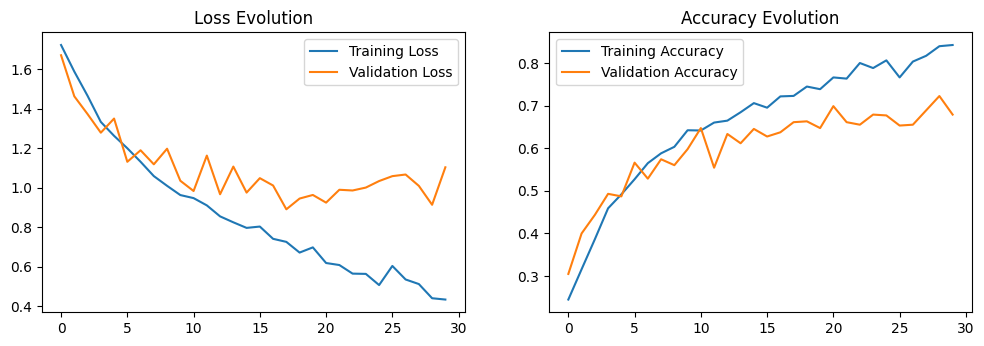

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history['loss'], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history['accuracy'], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

In [ ]:
evaluation = cnn.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=6)
Y_test_categorical = to_categorical(Y_test, num_classes=6)

# Convert your list of tuples to separate lists of images and labels
X_train_images, X_train_labels = zip(*X_train)
X_test_images, X_test_labels = zip(*X_test)

X_train_images = np.array(X_train_images)
X_test_images = np.array(X_test_images)

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest')


train_generator = train_datagen.flow(
        x=X_train_images,
        y=Y_train_categorical,
        batch_size=32,
        shuffle = True)

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)



test_generator = test_datagen.flow(
        x=X_test_images,
        y=Y_test_categorical,
        batch_size=32,
        shuffle = True)

model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
# Load the pre-trained VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Define learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)




# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(BatchNormalization())
#cnn.add(base_model)
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

opt = Adam(learning_rate=0.01)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
epochs=50
batch_size=128
# finally compile and train the cnn
cnn.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model_1 = cnn.fit(x=train_generator, validation_data=test_generator, epochs=epochs, callbacks=[reduce_lr,checkpoint])
model = tf.keras.models.load_model('best_model.h5')
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])